## **Unsupervised K-Means Clustring with Python Scikit Learn**
Predict optimum number of clusters.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn import datasets

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### *Elbow Method for Selecting Optimum # of clusters**

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


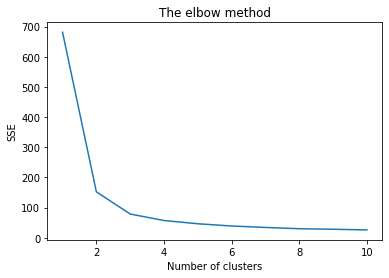

In [7]:
from sklearn.cluster import KMeans
x = df.iloc[:, :4]

# Plotting the Elbow Method result
from sklearn.cluster import KMeans
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Plotting the Elbow Method result
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Sum of Squared Errors
plt.show()

The Optimal No of Clusters are **3**

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                max_iter = 300, n_init = 10, random_state = 0)
y_means = kmeans.fit_predict(x)

In [67]:
df['prediction'] = y_means

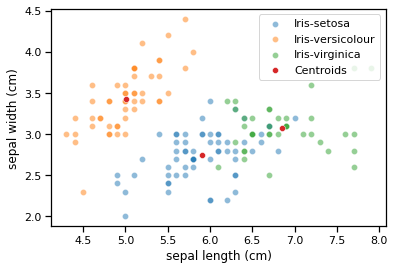

In [66]:
sns.set_context("notebook")
fig, ax = plt.subplots()
sns.scatterplot(x=df['sepal length (cm)'][df['prediction'] == 0], y=df['sepal width (cm)'][df['prediction'] == 0], data=df, ax=ax, label = 'Iris-setosa',alpha=0.5)
sns.scatterplot(x=df['sepal length (cm)'][df['prediction'] == 1], y=df['sepal width (cm)'][df['prediction'] == 1], data=df, ax=ax, label = 'Iris-versicolour',alpha=0.5)
sns.scatterplot(x=df['sepal length (cm)'][df['prediction'] == 2], y=df['sepal width (cm)'][df['prediction'] == 2], data=df, ax=ax, label = 'Iris-virginica',alpha=0.5)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:,1], data=kmeans, label = 'Centroids', ax=ax)
plt.show()